In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import numpy as np
import math
import warnings
import missingno as msno
from pprint import pprint
from chinese_calendar import is_workday, is_holiday
from pathlib import Path
from sklearn.preprocessing import PowerTransformer
import scipy.stats as st
from collections import defaultdict

# 固定随机种子，稳定模型效果
random.seed(2021) 
np.random.seed(2021)
%matplotlib inline
warnings.filterwarnings("ignore")
plt.rc("font",family="SimHei",size="10")
plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',200)
pd.set_option('expand_frame_repr', False)

In [14]:
root = Path(os.getcwd()).resolve().parent / "data"
q2_df = root / "附件4：门店交易训练数据.txt"
train = root / "附件1：估价训练数据.txt"
i2n = ["carid", "pushDate", "pushPrice", "updatePriceTimeJson", "pullDate", "withdrawDate"]

index2name = ["carid", "展销时间", "品牌 id", "车系 id", "车型 id", "里程", "车辆颜色", "车辆所在城市 id", "国标码",
              "过户次数", "载客人数", "注册日期", "上牌日期", "国别", "厂商类型", "年款", "排量", "变速箱", "燃油类型",
              "新车价"]

# category存放的是类别特征的名称
category = ["品牌 id", "车系 id", "车型 id", "车辆颜色", "车辆所在城市 id", "厂商类型", "燃油类型"] # 类别类型特征

# numerical存放的是数值特征的名称
numerical = ["Feature_5", "年款", "排量", "变速箱", "Feature_2", "Feature_13", "载客人数", "新车价", "里程", "target"] #  "厂商类型"实数类型特征, "Feature_12", "Feature_8"

# cross_num存放的是要进行特征交叉的特征的名称
cross_num = ["新车价", "Feature_2", "Feature_12_1"]

# 匿名特征为Feature_i，此处将15个匿名特征加入到index2name中
for _ in range(1, 16):
    index2name.append("Feature_"+str(_))
index2name.append("target")
def __i2n(df):
    df = df.rename(columns={index: _ for index, _ in enumerate(index2name)})
    return df

In [3]:
q2 = pd.read_csv(q2_df, sep='\t', header=None)
q2.rename(columns={index: _ for index, _ in enumerate(i2n)}, inplace=True)

In [4]:
train_df = pd.read_csv(train, sep='\t', header=None)
train_df = __i2n(train_df)

In [5]:
result = pd.merge(q2, train_df, left_on="carid", right_on="carid", how="left")

In [6]:
del result["withdrawDate"]

In [7]:
result["展销时间"] = pd.to_datetime(result["展销时间"])
result["注册日期"] = pd.to_datetime(result["注册日期"])
result["上牌日期"] = pd.to_datetime(result["上牌日期"])
result["pushDate"] = pd.to_datetime(result["pushDate"])
result["pullDate"] = pd.to_datetime(result["pullDate"])

In [8]:
result["成交周期"] = (result["pullDate"] - result["pushDate"]).map(lambda x: x.days)

In [22]:
result.to_excel(root / "Q2.xlsx", index=False)

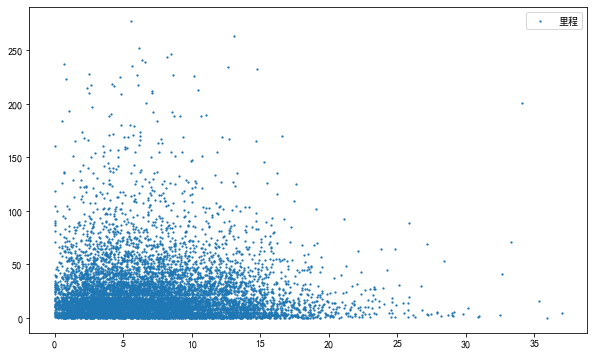

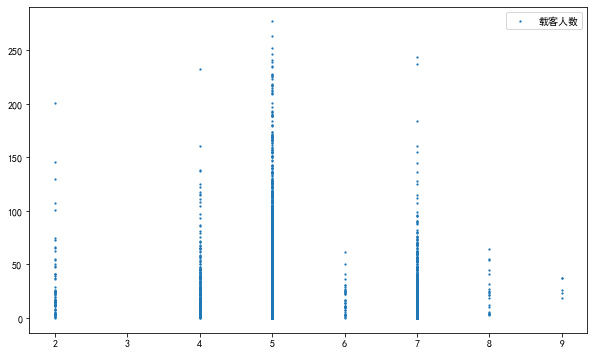

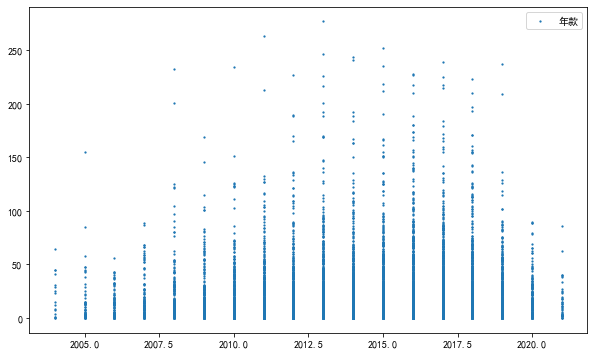

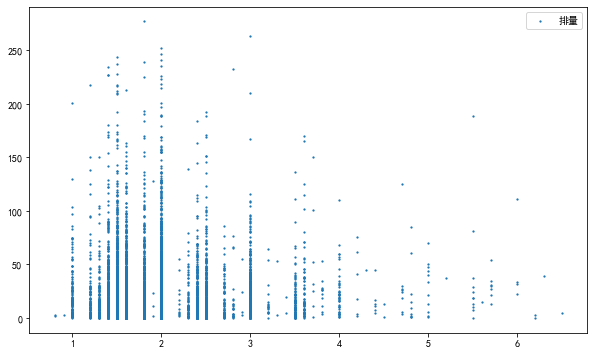

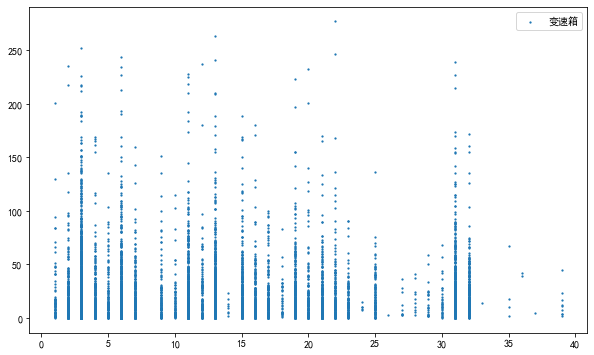

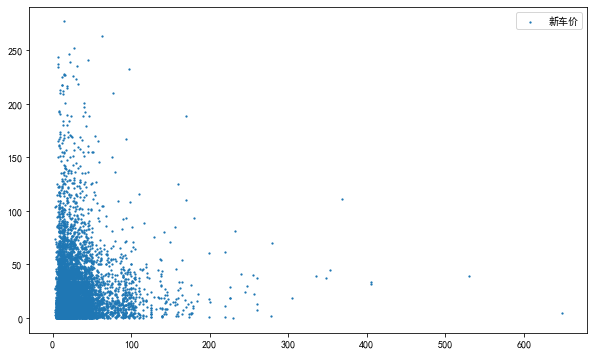

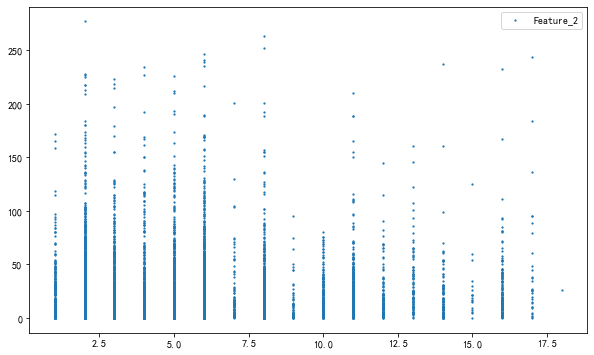

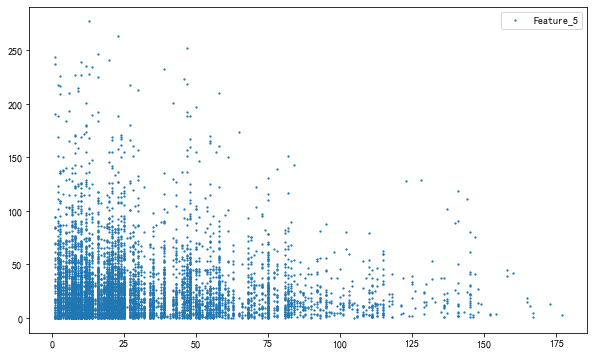

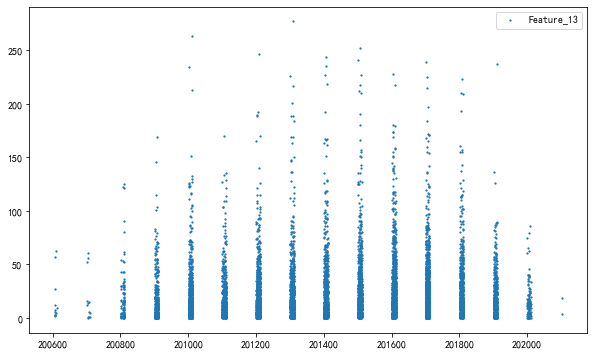

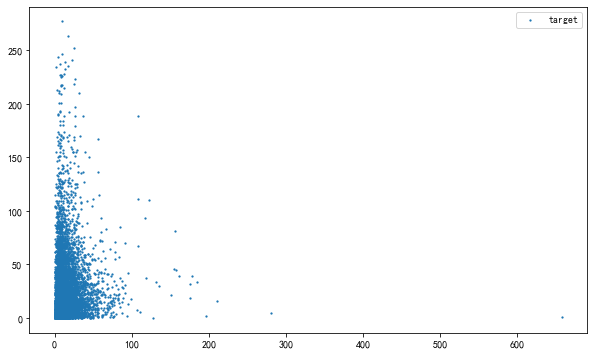

In [16]:
for _ in index2name[:]:
    if _ in numerical:
        train_x_series = result.loc[:, _]
        plt.figure(figsize=(10,6))
        plt.scatter(train_x_series, result.loc[:, "成交周期"], label=_, s=1.5)
        plt.legend()
        plt.show()